In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as md
import matplotlib.patches as mpatches

%matplotlib inline

In [2]:
df = pd.read_csv('2019-11-15.csv')

In [3]:
df.head()

Unnamed: 0 signal  bat1_id  bat1_loc bat1_condition pump_1 pump_2  \
0  14-11-2019-16:10:16   play      NaN       NaN   equal reward    NaN    NaN   
1  14-11-2019-16:10:17    NaN      NaN       NaN   equal reward    NaN    NaN   
2  14-11-2019-16:10:18    NaN      NaN       NaN   equal reward    NaN    NaN   
3  14-11-2019-16:10:19    NaN      NaN       NaN   equal reward    NaN    NaN   
4  14-11-2019-16:10:20    NaN      NaN       NaN   equal reward    NaN    NaN   

  bat2_id  bat2_loc bat2_condition  
0     NaN       NaN   equal reward  
1     NaN       NaN   equal reward  
2     NaN       NaN   equal reward  
3     NaN       NaN   equal reward  
4     NaN       NaN   equal reward

In [4]:
df.drop(['signal', 'bat1_id','bat1_loc','bat1_condition'], axis=1, inplace=True)

In [5]:
df.head()

Unnamed: 0 pump_1 pump_2 bat2_id  bat2_loc bat2_condition
0  14-11-2019-16:10:16    NaN    NaN     NaN       NaN   equal reward
1  14-11-2019-16:10:17    NaN    NaN     NaN       NaN   equal reward
2  14-11-2019-16:10:18    NaN    NaN     NaN       NaN   equal reward
3  14-11-2019-16:10:19    NaN    NaN     NaN       NaN   equal reward
4  14-11-2019-16:10:20    NaN    NaN     NaN       NaN   equal reward

In [6]:
# df_clean = df.dropna(subset=['condition', 'feeder'])

In [6]:
df.rename(columns={'Unnamed: 0' :'time'}, inplace=True)

In [7]:
df.index = pd.to_datetime(df['time'], dayfirst=True)

In [8]:
df.drop(['time'], axis=1, inplace=True)

In [9]:
df.head()

pump_1 pump_2 bat2_id  bat2_loc bat2_condition
time                                                              
2019-11-14 16:10:16    NaN    NaN     NaN       NaN   equal reward
2019-11-14 16:10:17    NaN    NaN     NaN       NaN   equal reward
2019-11-14 16:10:18    NaN    NaN     NaN       NaN   equal reward
2019-11-14 16:10:19    NaN    NaN     NaN       NaN   equal reward
2019-11-14 16:10:20    NaN    NaN     NaN       NaN   equal reward

In [10]:
df.pump_1.unique()

array([nan, 'no 1', '1'], dtype=object)

In [11]:
# give score 1 to pump2, score -1 to pump1 and 0 to Nan
df_score = pd.DataFrame(df.copy())

In [12]:
mapping_1 = {'no 1': -1, '1': -1}
mapping_2 = {'no 2': 1, '2': 1}
df_score.replace({'pump_1': mapping_1, 'pump_2': mapping_2}, inplace= True)

In [13]:
df_score['pump_1'].fillna(0, inplace= True)
df_score['pump_2'].fillna(0, inplace= True)

In [14]:
df_score['pump_2'].unique()

array([0., 1.])

In [15]:
df_score.to_csv("14.11.19_score.csv")

In [16]:
# filling the gaps in read #need to fix
df.bat2_id = df.bat2_id.fillna(method = 'pad', limit = 2)
df.bat2_loc = df.bat2_loc.fillna(method = 'pad', limit = 2)

In [12]:
df.to_csv("fillna_test_14.11.19.csv")

In [17]:
df.index[0].day

14

In [18]:
#create df_conds
df_no_idx = df.reset_index()

In [19]:
df.shift().shape

(60659, 5)

In [20]:
df_conds = pd.concat([df_no_idx['bat2_condition'], df_no_idx['bat2_condition'].shift()], axis=1)

In [21]:
df_conds

bat2_condition bat2_condition
0       equal reward            NaN
1       equal reward   equal reward
2       equal reward   equal reward
3       equal reward   equal reward
4       equal reward   equal reward
5       equal reward   equal reward
6       equal reward   equal reward
7       equal reward   equal reward
8       equal reward   equal reward
9       equal reward   equal reward
10      equal reward   equal reward
11      equal reward   equal reward
12      equal reward   equal reward
13      equal reward   equal reward
14      equal reward   equal reward
15      equal reward   equal reward
16      equal reward   equal reward
17      equal reward   equal reward
18      equal reward   equal reward
19      equal reward   equal reward
20      equal reward   equal reward
21      equal reward   equal reward
22      equal reward   equal reward
23      equal reward   equal reward
24      equal reward   equal reward
25      equal reward   equal reward
26      equal reward   equal reward
27      equal reward   equal reward
28      equal reward   equal reward
29      equal reward   equal reward
...              ...            ...
60629   equal reward   equal reward
60630   equal reward   equal reward
60631   equal reward   equal reward
60632   equal reward   equal reward
60633   equal reward   equal reward
60634   equal reward   equal reward
60635   equal reward   equal reward
60636   equal reward   equal reward
60637   equal reward   equal reward
60638            NaN   equal reward
60639   equal reward            NaN
60640   equal reward   equal reward
60641   equal reward   equal reward
60642   equal reward   equal reward
60643   equal reward   equal reward
60644   equal reward   equal reward
60645   equal reward   equal reward
60646   equal reward   equal reward
60647   equal reward   equal reward
60648   equal reward   equal reward
60649   equal reward   equal reward
60650   equal reward   equal reward
60651   equal reward   equal reward
60652   equal reward   equal reward
60653   equal reward   equal reward
60654   equal reward   equal reward
60655   equal reward   equal reward
60656   equal reward   equal reward
60657   equal reward   equal reward
60658   equal reward   equal reward

[60659 rows x 2 columns]

In [22]:
df_conds.columns = ['cond1', 'cond2']

In [23]:
df_conds = df_conds.fillna(method='ffill')

In [24]:
mask = df_conds['cond1'] != df_conds['cond2']

In [25]:
df_conds[mask]

cond1         cond2
0      equal reward           NaN
3600       R reward  equal reward
7201   equal reward      R reward
14402      R reward  equal reward
18002  equal reward      R reward
21602      R reward  equal reward
25202  equal reward      R reward
28803      R reward  equal reward
32403  equal reward      R reward
46798      R reward  equal reward
50386  equal reward      R reward
53946      R reward  equal reward
57503  equal reward      R reward

In [26]:
idx = df_conds[df_conds['cond1'] != df_conds['cond2']].index

In [27]:
idx

Int64Index([    0,  3600,  7201, 14402, 18002, 21602, 25202, 28803, 32403,
            46798, 50386, 53946, 57503],
           dtype='int64')

In [28]:
df_no_idx.shift().loc[idx]['time']

0                       NaT
3600    2019-11-14 17:10:15
7201    2019-11-14 18:10:16
14402   2019-11-14 20:10:17
18002   2019-11-14 21:10:17
21602   2019-11-14 22:10:17
25202   2019-11-14 23:10:17
28803   2019-11-15 00:10:18
32403   2019-11-15 01:10:18
46798   2019-11-15 05:10:21
50386   2019-11-15 06:10:21
53946   2019-11-15 07:10:21
57503   2019-11-15 08:10:23
Name: time, dtype: datetime64[ns]

In [29]:
idx_list = list(idx)

In [30]:
idx_list.remove(0)

In [31]:
idx_list = [x-1 for x in idx_list]

In [32]:
idx_list_max = idx_list + [df.index.shape[0]-1]
idx_list_min = [0] + [x+1 for x in idx_list]

In [33]:
idx_list_min

[0,
 3600,
 7201,
 14402,
 18002,
 21602,
 25202,
 28803,
 32403,
 46798,
 50386,
 53946,
 57503]

In [34]:
idx_list_max

[3599,
 7200,
 14401,
 18001,
 21601,
 25201,
 28802,
 32402,
 46797,
 50385,
 53945,
 57502,
 60658]

In [35]:
# 
df.iloc[idx_list]

pump_1 pump_2                   bat2_id  bat2_loc  \
time                                                                    
2019-11-14 17:10:15    NaN    NaN                       NaN       NaN   
2019-11-14 18:10:16    NaN    NaN                       NaN       NaN   
2019-11-14 20:10:17    NaN    NaN                       NaN       NaN   
2019-11-14 21:10:17    NaN    NaN                       NaN       NaN   
2019-11-14 22:10:17    NaN    NaN                       NaN       NaN   
2019-11-14 23:10:17    NaN   no 2  307410CD2C040B4000000001     102.0   
2019-11-15 00:10:18    NaN    NaN                       NaN       NaN   
2019-11-15 01:10:18    NaN    NaN                       NaN       NaN   
2019-11-15 05:10:21    NaN    NaN                       NaN       NaN   
2019-11-15 06:10:21    NaN    NaN                       NaN       NaN   
2019-11-15 07:10:21    NaN    NaN                       NaN       NaN   
2019-11-15 08:10:23    NaN    NaN                       NaN       NaN   

                    bat2_condition  
time                                
2019-11-14 17:10:15   equal reward  
2019-11-14 18:10:16       R reward  
2019-11-14 20:10:17   equal reward  
2019-11-14 21:10:17       R reward  
2019-11-14 22:10:17   equal reward  
2019-11-14 23:10:17       R reward  
2019-11-15 00:10:18   equal reward  
2019-11-15 01:10:18       R reward  
2019-11-15 05:10:21   equal reward  
2019-11-15 06:10:21       R reward  
2019-11-15 07:10:21   equal reward  
2019-11-15 08:10:23            NaN

In [36]:
df['bat2_condition'].unique()

array(['equal reward', 'R reward', nan], dtype=object)

In [37]:
df['bat2_condition'].fillna('unknown', inplace=True)
# df.dropna(inplace=True)

In [38]:
df_min = df.iloc[idx_list_min]

In [39]:
df_max = df.iloc[idx_list_max]

In [40]:
df.index.shape

(60659,)

In [41]:
df_min.index

DatetimeIndex(['2019-11-14 16:10:16', '2019-11-14 17:10:16',
               '2019-11-14 18:10:17', '2019-11-14 20:10:18',
               '2019-11-14 21:10:18', '2019-11-14 22:10:18',
               '2019-11-14 23:10:18', '2019-11-15 00:10:19',
               '2019-11-15 01:10:19', '2019-11-15 05:10:22',
               '2019-11-15 06:10:22', '2019-11-15 07:10:22',
               '2019-11-15 08:10:24'],
              dtype='datetime64[ns]', name='time', freq=None)

In [44]:
df_max.index

DatetimeIndex(['2019-11-14 17:10:15', '2019-11-14 18:10:16',
               '2019-11-14 20:10:17', '2019-11-14 21:10:17',
               '2019-11-14 22:10:17', '2019-11-14 23:10:17',
               '2019-11-15 00:10:18', '2019-11-15 01:10:18',
               '2019-11-15 05:10:21', '2019-11-15 06:10:21',
               '2019-11-15 07:10:21', '2019-11-15 08:10:23',
               '2019-11-15 09:03:44'],
              dtype='datetime64[ns]', name='time', freq=None)

In [42]:
condition_start_end = list(zip(df_min.index, df_max.index))

In [43]:
condition_start_end

[(Timestamp('2019-11-14 16:10:16'), Timestamp('2019-11-14 17:10:15')),
 (Timestamp('2019-11-14 17:10:16'), Timestamp('2019-11-14 18:10:16')),
 (Timestamp('2019-11-14 18:10:17'), Timestamp('2019-11-14 20:10:17')),
 (Timestamp('2019-11-14 20:10:18'), Timestamp('2019-11-14 21:10:17')),
 (Timestamp('2019-11-14 21:10:18'), Timestamp('2019-11-14 22:10:17')),
 (Timestamp('2019-11-14 22:10:18'), Timestamp('2019-11-14 23:10:17')),
 (Timestamp('2019-11-14 23:10:18'), Timestamp('2019-11-15 00:10:18')),
 (Timestamp('2019-11-15 00:10:19'), Timestamp('2019-11-15 01:10:18')),
 (Timestamp('2019-11-15 01:10:19'), Timestamp('2019-11-15 05:10:21')),
 (Timestamp('2019-11-15 05:10:22'), Timestamp('2019-11-15 06:10:21')),
 (Timestamp('2019-11-15 06:10:22'), Timestamp('2019-11-15 07:10:21')),
 (Timestamp('2019-11-15 07:10:22'), Timestamp('2019-11-15 08:10:23')),
 (Timestamp('2019-11-15 08:10:24'), Timestamp('2019-11-15 09:03:44'))]

In [44]:
df.head()

pump_1 pump_2 bat2_id  bat2_loc bat2_condition
time                                                              
2019-11-14 16:10:16    NaN    NaN     NaN       NaN   equal reward
2019-11-14 16:10:17    NaN    NaN     NaN       NaN   equal reward
2019-11-14 16:10:18    NaN    NaN     NaN       NaN   equal reward
2019-11-14 16:10:19    NaN    NaN     NaN       NaN   equal reward
2019-11-14 16:10:20    NaN    NaN     NaN       NaN   equal reward

In [45]:
df_bat1 = df.copy()

In [52]:
df_bat1.drop(['bat_id_2','bat2_loc'], axis=1, inplace=True)

In [53]:
df_bat1.head()

In [54]:
is_f2 = df_bat1['bat1_loc'] == 102 #filter/mask

In [55]:
right_bat1 = df_bat1[is_f2]

In [56]:
right_bat1.head()

In [57]:
right_bat1 = right_bat1.dropna(subset=['pump'])

In [58]:
right_bat1.head()

In [59]:
right_bat1.to_csv("bat1_102_choices")

In [126]:
df_bat1.head()

In [61]:
df_bat1_choices = df_bat1.copy()

In [132]:
# for t in df_bat1_choices['time'].head():
df_bat1.resample('15Min').mean()

In [62]:
df_bat1_choices = df_bat1_choices.replace(102, 2)

In [63]:
df_bat1_choices = df_bat1_choices.replace(101, 1)

In [64]:
df_bat1_choices['bat1_loc'].unique()

In [65]:
df_bat1_choices = df_bat1_choices.dropna(subset=['pump'])

In [66]:
df_bat1_choices = df_bat1_choices.dropna()

In [67]:
df_bat1_choices.head()

In [68]:
df_bat1_choices.to_csv("df_bat1_choices")

In [69]:
# df_bat1_choices = df_bat1_choices.groupby('bat1_loc').count()

In [70]:
# df_bat1_choices

In [71]:
# df_bat1_choices['time'] = pd.to_datetime(df_bat1_choices.index)

In [46]:
df_bat1_choices = pd.read_csv('14.11.19_score.csv')

In [48]:
df_bat1_choices.head()

time  pump_1  pump_2 bat2_id  bat2_loc bat2_condition
0  2019-11-14 16:10:16     0.0     0.0     NaN       NaN   equal reward
1  2019-11-14 16:10:17     0.0     0.0     NaN       NaN   equal reward
2  2019-11-14 16:10:18     0.0     0.0     NaN       NaN   equal reward
3  2019-11-14 16:10:19     0.0     0.0     NaN       NaN   equal reward
4  2019-11-14 16:10:20     0.0     0.0     NaN       NaN   equal reward

In [49]:
df_bat1_choices['time'] = pd.to_datetime(df_bat1_choices['time'], dayfirst=True)

In [50]:
## new
df_bat1_choices['sum_pump'] = df_bat1_choices['pump_1']+df_bat1_choices['pump_2']

In [51]:
df_bat1_choices['sum_pump'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: sum_pump, dtype: float64

In [56]:
df_bat1_choices['moving avg'] = df_bat1_choices['sum_pump'].rolling(window=15).mean()

In [60]:
df_bat1_choices2 = df_bat1_choices.copy()
df_bat1_choices2.index = pd.to_datetime(df_bat1_choices2['time'], dayfirst=True)

In [64]:
# df_bat1_choices2['better moving avg'] = df.resample("15Min").sum().fillna(0).rolling(window=3, min_periods=1).mean()
df_15 = df_bat1_choices2.resample('15Min').mean()

In [68]:
df_bat1_choices['15_min_avg'] = df_15['sum_pump']

In [74]:
df_15['sum_pump']

time
2019-11-14 16:00:00    0.000000
2019-11-14 16:15:00    0.001111
2019-11-14 16:30:00    0.000000
2019-11-14 16:45:00    0.000000
2019-11-14 17:00:00    0.000000
2019-11-14 17:15:00    0.000000
2019-11-14 17:30:00    0.000000
2019-11-14 17:45:00    0.000000
2019-11-14 18:00:00   -0.001111
2019-11-14 18:15:00   -0.002222
2019-11-14 18:30:00    0.000000
2019-11-14 18:45:00    0.002222
2019-11-14 19:00:00    0.002222
2019-11-14 19:15:00    0.002222
2019-11-14 19:30:00    0.002222
2019-11-14 19:45:00    0.001111
2019-11-14 20:00:00    0.002222
2019-11-14 20:15:00    0.003333
2019-11-14 20:30:00   -0.002222
2019-11-14 20:45:00    0.001111
2019-11-14 21:00:00    0.000000
2019-11-14 21:15:00   -0.005556
2019-11-14 21:30:00    0.000000
2019-11-14 21:45:00   -0.001111
2019-11-14 22:00:00    0.002222
2019-11-14 22:15:00   -0.005556
2019-11-14 22:30:00    0.003333
2019-11-14 22:45:00    0.000000
2019-11-14 23:00:00    0.004444
2019-11-14 23:15:00    0.002222
                         ...   
201

In [126]:
df_15_sum_r = df_bat1_choices2.resample('15Min').sum()
df_20_sum = df_bat1_choices2.resample('20Min', base=10).sum()

In [111]:
df_15_sum_r['pump_2']

time
2019-11-14 16:00:00    0.0
2019-11-14 16:15:00    1.0
2019-11-14 16:30:00    0.0
2019-11-14 16:45:00    0.0
2019-11-14 17:00:00    0.0
2019-11-14 17:15:00    0.0
2019-11-14 17:30:00    0.0
2019-11-14 17:45:00    0.0
2019-11-14 18:00:00    1.0
2019-11-14 18:15:00    1.0
2019-11-14 18:30:00    1.0
2019-11-14 18:45:00    2.0
2019-11-14 19:00:00    4.0
2019-11-14 19:15:00    4.0
2019-11-14 19:30:00    3.0
2019-11-14 19:45:00    2.0
2019-11-14 20:00:00    2.0
2019-11-14 20:15:00    3.0
2019-11-14 20:30:00    2.0
2019-11-14 20:45:00    4.0
2019-11-14 21:00:00    2.0
2019-11-14 21:15:00    0.0
2019-11-14 21:30:00    4.0
2019-11-14 21:45:00    2.0
2019-11-14 22:00:00    4.0
2019-11-14 22:15:00    0.0
2019-11-14 22:30:00    3.0
2019-11-14 22:45:00    3.0
2019-11-14 23:00:00    5.0
2019-11-14 23:15:00    3.0
                      ... 
2019-11-15 01:45:00    3.0
2019-11-15 02:00:00    0.0
2019-11-15 02:15:00    2.0
2019-11-15 02:30:00    1.0
2019-11-15 02:45:00    1.0
2019-11-15 03:00:00    

In [114]:
df_bat1_choices2['better moving avg'] = df_bat1_choices2['bat1_loc'].rolling('1h', min_periods=1).mean()
# df.rolling('2s', min_periods=1).sum()

In [138]:
# df_15 = df_bat1_choices2.resample('15Min').mean()
df.groupby(pd.Grouper(level='times', freq='H')).median() #check this

In [89]:
df_15.head()

pump_1    pump_2  bat2_loc  sum_pump  moving avg  \
time                                                                    
2019-11-14 16:00:00     0.0  0.000000       NaN  0.000000    0.000000   
2019-11-14 16:15:00     0.0  0.001111     102.0  0.001111    0.001111   
2019-11-14 16:30:00     0.0  0.000000       NaN  0.000000    0.000000   
2019-11-14 16:45:00     0.0  0.000000       NaN  0.000000    0.000000   
2019-11-14 17:00:00     0.0  0.000000       NaN  0.000000    0.000000   

                     better moving avg                time  
time                                                        
2019-11-14 16:00:00                NaN 2019-11-14 16:00:00  
2019-11-14 16:15:00             1224.0 2019-11-14 16:15:00  
2019-11-14 16:30:00              816.0 2019-11-14 16:30:00  
2019-11-14 16:45:00              816.0 2019-11-14 16:45:00  
2019-11-14 17:00:00                0.0 2019-11-14 17:00:00

In [95]:
df_15.index = pd.to_datetime(df_15.index, dayfirst=True)

In [97]:
df_15.index[0].hour

16

In [137]:
df_bat1_choices2.tail()

In [74]:
pd.plotting.register_matplotlib_converters(explicit=True)

In [75]:
for min_time,max_time in condition_start_end:
    print (min_time.month,max_time.day)

<Figure size 1080x1080 with 0 Axes>

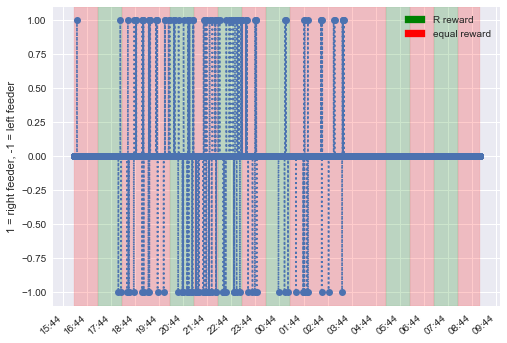

In [140]:
# # df_bat1_choices = df_bat1_choices.dropna()
fig = plt.figure(figsize=(15,15))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
choices = plt.plot_date(df_bat1_choices['time'], df_bat1_choices['sum_pump'], linestyle=':')
# choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'])

plt.ylabel('1 = right feeder, -1 = left feeder')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'equal reward': 'r'}
for min_time,max_time in condition_start_end:
    # min_time = pd.to_datetime(min_time)
    # max_time = pd.to_datetime(max_time)
    cond = df_min.loc[min_time]['bat2_condition']
    # print (cond, min_time, max_time)
    plt.axvspan(min_time,max_time, alpha=0.2, color=cond_dict[cond])
# # act_label = ax.legend(['Right feeder activity'])
# # ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='equal reward')
plt.legend(handles=[g_patch,r_patch], loc='upper right')

<Figure size 1080x1080 with 0 Axes>

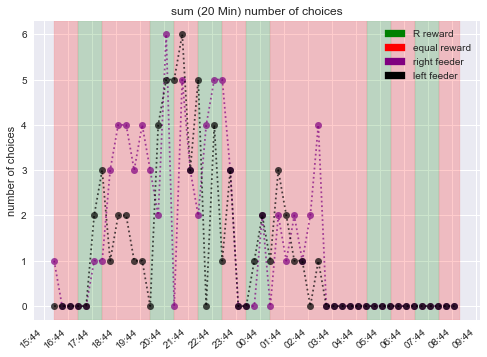

In [139]:
# compare between number of choices in each feeder (total 133 choices)
fig = plt.figure(figsize=(15,15))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
choices = plt.plot_date(df_20_sum.index, df_20_sum['pump_2'], c = 'purple', alpha = 0.7, linestyle=':')
plt.plot_date(df_20_sum.index, np.abs(df_20_sum['pump_1']), c = 'black', alpha = 0.7, linestyle=':')
# choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'])

plt.ylabel('number of choices')
plt.title ('sum (20 Min) number of choices')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'equal reward': 'r'}
for min_time,max_time in condition_start_end:
    # min_time = pd.to_datetime(min_time)
    # max_time = pd.to_datetime(max_time)
    cond = df_min.loc[min_time]['bat2_condition']
    # print (cond, min_time, max_time)
    plt.axvspan(min_time,max_time, alpha=0.2, color=cond_dict[cond])
# # act_label = ax.legend(['Right feeder activity'])
# # ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='equal reward')
r_line = mpatches.Patch(color='purple', label='right feeder')
l_line = mpatches.Patch(color='black', label='left feeder')
plt.legend(handles=[g_patch,r_patch,r_line,l_line], loc='upper right')

In [79]:
# plt.scatter(x, y, s=z*1000plt.scatter(x, y, s=z*1000

fig = plt.figure(figsize=(15,15))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
# choices = plt.scatter(df_15.index, df_15['sum_pump']) #scatter isn't good
choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'])

plt.ylabel('1 = right feeder, -1 = left feeder')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'equal reward': 'r'}
for min_time,max_time in condition_start_end:
    # min_time = pd.to_datetime(min_time)
    # max_time = pd.to_datetime(max_time)
    cond = df_min.loc[min_time]['bat2_condition']
    # print (cond, min_time, max_time)
    plt.axvspan(min_time,max_time, alpha=0.2, color=cond_dict[cond])
# # act_label = ax.legend(['Right feeder activity'])
# # ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='equal reward')
plt.legend(handles=[g_patch,r_patch], loc='upper right')

RuntimeError: Locator attempting to generate 1531 ticks from 737346.1270833333 to 737409.8770833333: exceeds Locator.MAXTICKS

In [116]:
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
choices = plt.plot_date(df_bat1_choices['time'], df_bat1_choices2['better moving avg'], linestyle='solid')
# choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'])

plt.ylabel('2 = right feeder, 1 = left feeder')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    # min_time = pd.to_datetime(min_time)
    # max_time = pd.to_datetime(max_time)
    cond = df_min.loc[min_time]['condition']
    # print (cond, min_time, max_time)
    plt.axvspan(min_time,max_time, alpha=0.2, color=cond_dict[cond])
# # act_label = ax.legend(['Right feeder activity'])
# ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper left')

In [55]:
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
choices = plt.plot_date(df_15.index, df_15['bat1_loc'], linestyle='solid')
# choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'])

plt.ylabel('2 = right feeder, 1 = left feeder')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    # min_time = pd.to_datetime(min_time)
    # max_time = pd.to_datetime(max_time)
    cond = df_min.loc[min_time]['bat2_condition']
    # print (cond, min_time, max_time)
    plt.axvspan(min_time,max_time, alpha=0.2, color=cond_dict[cond])
# # act_label = ax.legend(['Right feeder activity'])
# ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper left')

NameError: name 'df_15' is not defined

In [84]:
# df_bat1_choices = df_bat1_choices.groupby(pd.Grouper(freq='15Min', base=8, label='right'))['bat1_loc'].value_counts(normalize=True)

In [ ]:
# activity_df = df.groupby(pd.Grouper(freq='15Min', base=8, label='right'))['feeder'].value_counts(normalize=True)

In [68]:
# is_f2 = df_bat1['bat1_loc'] == "102" #filter/mask
# is_f1 = df_bat1['bat1_loc'] == "101" #filter/mask
# right_bat1 = df_bat1[is_f2]

In [99]:
# pref_df = pd.read_csv("bat1_102_choices", header = None, names = ('time', 'pref'))
# pref_df = pd.read_csv("bat1_102_choices")
# pref_df['time'] = pd.to_datetime(pref_df['time'])
# fig = plt.figure(figsize=(10,10))
# figtemp, ax = plt.subplots(1, 1)
# # ax.plot(activity_df_right)
# # ax.scatter(pref_df['time'], pref_df['pref'])
# # ax = pref_df.plot.scatter(x='time',y = 'pref')
# plt.style.use('seaborn')
# plt.plot_date(pref_df['time'], pref_df['pref'], linestyle='solid')
# # pref_df.plot(x='time', y='pref', kind='scatter', ax=ax)
# # Set time format and the interval of ticks (every 15 minutes)
# xformatter = md.DateFormatter('%H:%M')
# xlocator = md.MinuteLocator(interval = 60)
# # Set xtick labels to appear every 60 minutes
# ax.xaxis.set_major_locator(xlocator)
# ## Format xtick labels as HH:MM
# plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# # rotate_labels...
# for label in ax.get_xticklabels():
#     label.set_rotation(40)
#     label.set_horizontalalignment('right')

# cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
# for min_time,max_time in condition_start_end:
#     cond = df_min.loc[min_time]['condition']
#     plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])

In [ ]:
# activity_df_right = activity_df.xs("b'2'", level='feeder') #find only right

In [146]:
activity_df = pd.read_csv('activity_15Min')

In [147]:
activity_df.rename(columns={"feeder.1": "activity"}, inplace=True)
activity_df['time'] = pd.to_datetime(activity_df['time'])

In [148]:
activity_df.head()

In [121]:
is_b2 = activity_df['feeder'] == "b'2'" #filter/mask
right_sec_df = activity_df[is_b2]

In [122]:
right_sec_df.head()

In [150]:
is_b1 = activity_df['feeder'] == "b'1'" #filter/mask
left_sec_df = activity_df[is_b1]

In [151]:
left_sec_df.head()

In [139]:

fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
right_activity = plt.plot_date(right_sec_df['time'], right_sec_df['activity'], linestyle='solid', label = 'Right feeder activity')

plt.ylabel('Time spend on right feeder (in sec)')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])
act_label = ax.legend(['Right feeder activity'])
ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper right')

In [152]:
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
left_activity = plt.plot_date(left_sec_df['time'], left_sec_df['activity'], linestyle='solid', label = 'Left feeder activity')

plt.ylabel('Time spend on left feeder (in sec)')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])
act_label = ax.legend(['Left feeder activity'])
ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper right')

In [143]:
activity_df = pd.read_csv('activity_10Min')
activity_df.rename(columns={"feeder.1": "activity"}, inplace=True)
activity_df['time'] = pd.to_datetime(activity_df['time'])
is_b2 = activity_df['feeder'] == "b'2'" #filter/mask
right_sec_df10 = activity_df[is_b2]
is_b1 = activity_df['feeder'] == "b'1'" #filter/mask
left_sec_df10 = activity_df[is_b1]

In [145]:
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
right_activity = plt.plot_date(right_sec_df10['time'], right_sec_df10['activity'], linestyle='solid', label = 'Right feeder activity')

plt.ylabel('Time spend on right feeder (in sec)')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])
act_label = ax.legend(['Right feeder activity'])
ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper right')

In [179]:
choices_df_num = pd.read_csv('choices_df_num')
choices_df_num['time'] = pd.to_datetime(choices_df_num['time'])

In [180]:
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'], linestyle='solid')
# choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'])

plt.ylabel('1 = right feeder, -1 = left feeder')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])
# act_label = ax.legend(['Right feeder activity'])
# ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper left')

In [163]:
# choices_grouped = choices_df_num.groupby(pd.Grouper(freq='15Min', base=8, label='right'))['feeder'].value_counts()

In [97]:
df_test = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]},
                 index = [pd.Timestamp('20130101 09:00:00'),
                           pd.Timestamp('20130101 09:00:02'),
                           pd.Timestamp('20130101 09:00:03'),
                           pd.Timestamp('20130101 09:00:05'),
                           pd.Timestamp('20130101 09:00:06')])

In [98]:
df_test.rolling('2s', min_periods=1).sum()